--- Model: Computing Power ---
The model predicts the 1000000000000 milestone will be reached in 2045
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


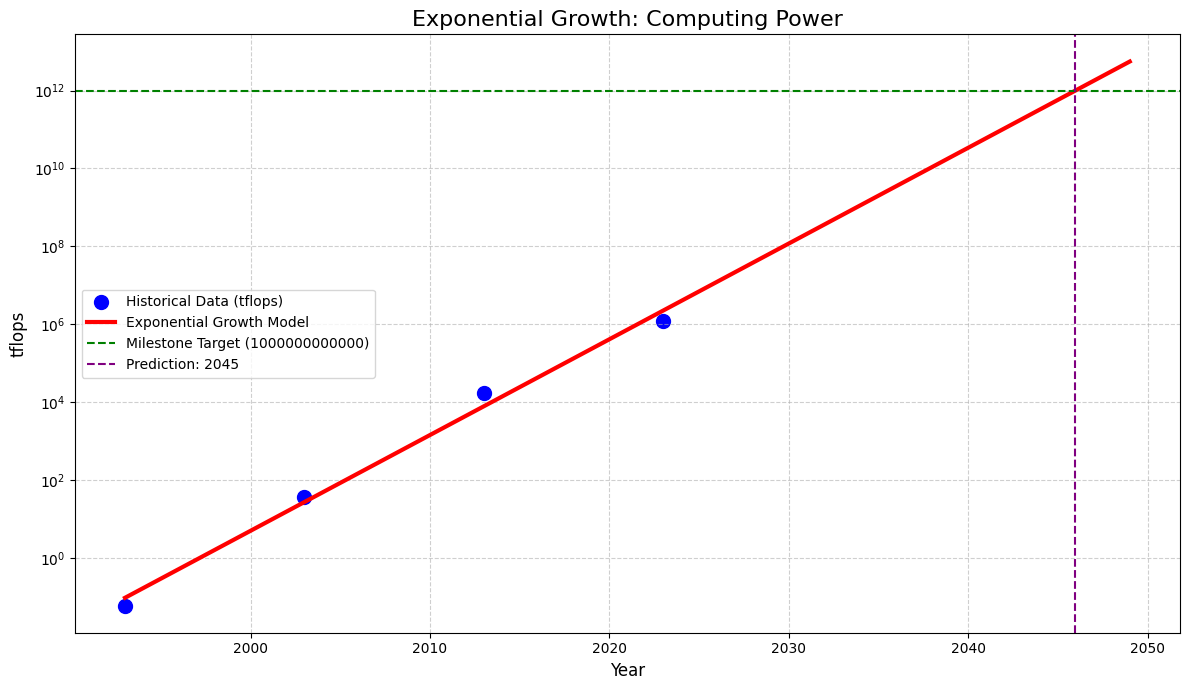

--- Model: Genome Sequencing Cost ---
The model predicts the 1 milestone will be reached in 2024
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


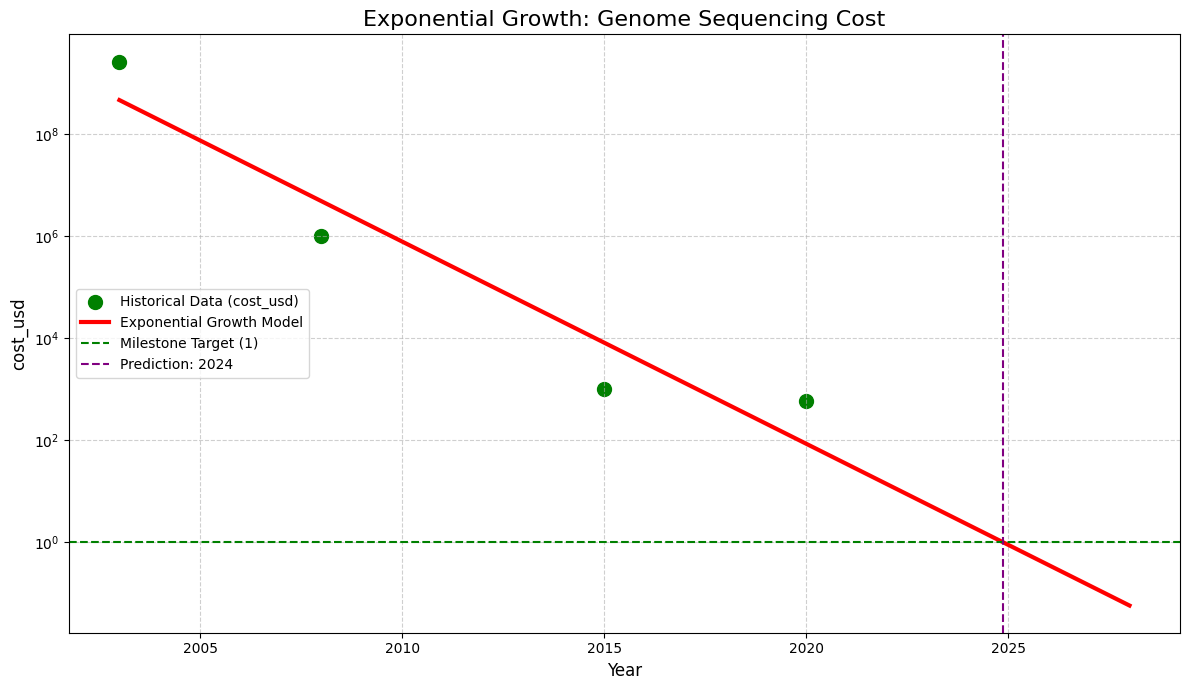

--- Model: Transistor Density ---
The model predicts the 1000000 milestone will be reached in 2030
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


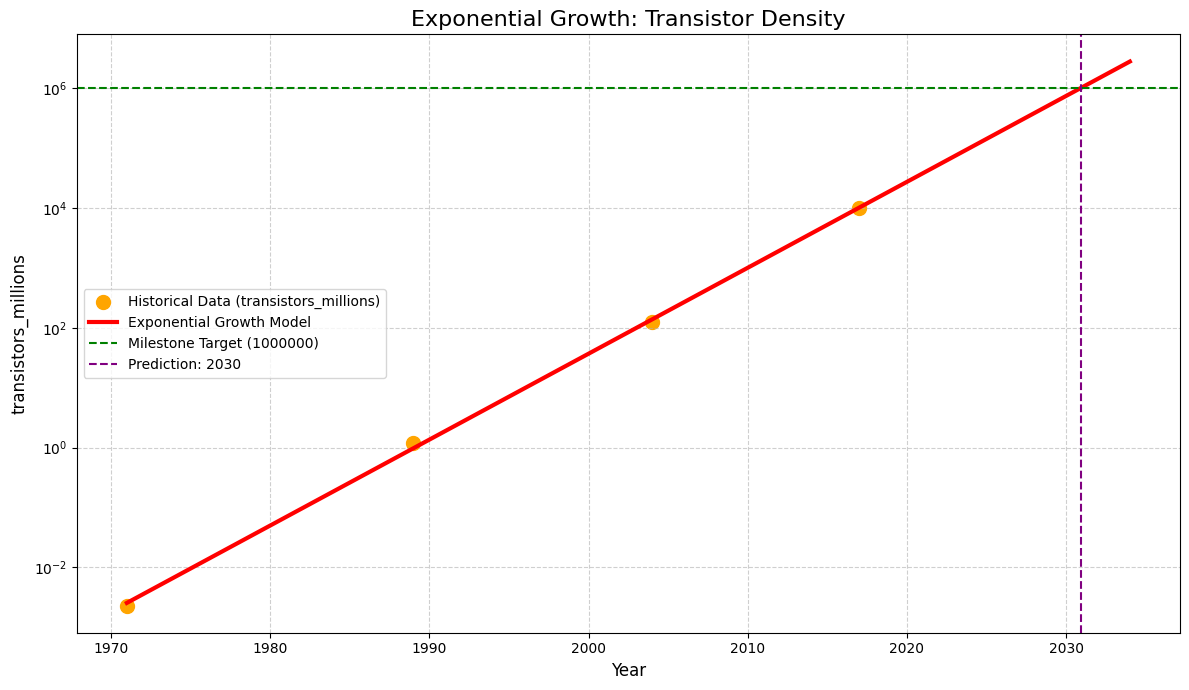

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def get_prediction_and_plot(df, title, y_label, target_value, color, log_scale=True):
    """
    Trains a linear regression model on log-transformed data,
    predicts the year a target value is reached, and plots the results.
    """
    if log_scale:
        df['log_y'] = np.log(df[y_label])
        y = df['log_y']
        target_log_value = np.log(target_value)
    else:
        y = df[y_label]
        target_log_value = target_value

    X = df[['year']]

    model = LinearRegression()
    model.fit(X, y)

    predicted_year_raw = (target_log_value - model.intercept_) / model.coef_[0]
    predicted_year = int(predicted_year_raw)

    print(f"--- Model: {title} ---")
    print(f"The model predicts the {target_value} milestone will be reached in {predicted_year}")
    print("-" * 30)

    # Visualization
    years_future = np.arange(min(df['year']), predicted_year + 5, 1).reshape(-1, 1)
    if log_scale:
        y_pred = np.exp(model.predict(years_future))
    else:
        y_pred = model.predict(years_future)

    plt.figure(figsize=(12, 7))
    plt.scatter(df['year'], df[y_label], color=color, s=100, label=f'Historical Data ({y_label})')
    plt.plot(years_future, y_pred, color='red', linewidth=3, label='Exponential Growth Model')
    plt.axhline(y=target_value, color='green', linestyle='--', label=f'Milestone Target ({target_value})')
    plt.axvline(x=predicted_year_raw, color='purple', linestyle='--', label=f'Prediction: {predicted_year}')

    plt.title(f'Exponential Growth: {title}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    if log_scale:
        plt.yscale('log')
    plt.tight_layout()
    plt.show()
    return predicted_year


# --- 1. Computing Power Model (TFLOPS) ---
data_flops = {
    "year": [1993, 2003, 2013, 2023],
    "tflops": [0.0597, 35.86, 17590, 1194000]
}
df_flops = pd.DataFrame(data_flops)
flops_prediction = get_prediction_and_plot(df_flops, 'Computing Power', 'tflops', 1000000000000, color='blue')

# --- 2. Genome Cost Model (USD) ---
data_genome = {
    "year": [2003, 2008, 2015, 2020],
    "cost_usd": [2700000000, 1000000, 1000, 600]
}
df_genome = pd.DataFrame(data_genome)
genome_prediction = get_prediction_and_plot(df_genome, 'Genome Sequencing Cost', 'cost_usd', 1, color='green')

# --- 3. Transistor Density Model (Millions) ---
data_transistors = {
    "year": [1971, 1989, 2004, 2017],
    "transistors_millions": [0.0023, 1.2, 125, 10000]
}
df_transistors = pd.DataFrame(data_transistors)
transistors_prediction = get_prediction_and_plot(df_transistors, 'Transistor Density', 'transistors_millions', 1000000, color='orange')